# Deep Learning with PyTorch Step-by-Step: A Beginner's Guide

# Chapter 0

In [1]:
try:
    import google.colab
    import requests
    url = 'https://raw.githubusercontent.com/dvgodoy/PyTorchStepByStep/master/config.py'
    r = requests.get(url, allow_redirects=True)
    open('config.py', 'wb').write(r.content)    
except ModuleNotFoundError:
    pass

from config import *
config_chapter0()
# This is needed to render the plots in this chapter
from plots.chapter0 import *

In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Visualizing Gradient Descent

## Model

$$
\Large y = b + w x + \epsilon
$$

## Data Generation

### Synthetic Data Generation

In [3]:
true_b = 1
true_w = 2
N = 100

# Data Generation
np.random.seed(42)
x = np.random.rand(N, 1)  # 使用均匀分布从[0, 1)区间采样100个样本
epsilon = (.1 * np.random.randn(N, 1))  # 使用标准正态分布采样100个样本作为随机噪声
y = true_b + true_w * x + epsilon

### Train-Validation-Test Split

In [4]:
# Shuffles the indices
idx = np.arange(N)
np.random.shuffle(idx)

# Uses first 80 random indices for train
train_idx = idx[:int(N*.8)]
# Uses the remaining indices for validation
val_idx = idx[int(N*.8):]

# Generates train and validation sets
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

(<Figure size 1200x600 with 2 Axes>,
 array([<Axes: title={'center': 'Generated Data - Train'}, xlabel='x', ylabel='y'>,
        <Axes: title={'center': 'Generated Data - Validation'}, xlabel='x', ylabel='y'>],
       dtype=object))

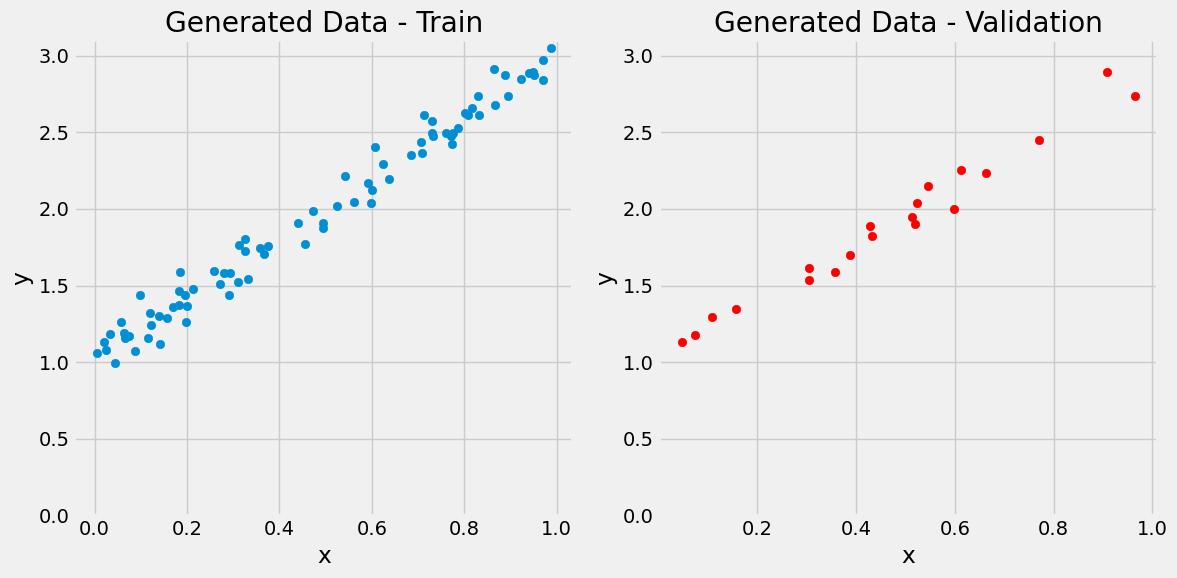

In [5]:
figure1(x_train, y_train, x_val, y_val)

## Step 0: Random Initialization

In [6]:
# Step 0 - Initializes parameters "b" and "w" randomly
np.random.seed(42)
b = np.random.randn(1)
w = np.random.randn(1)

print(b, w)

[0.49671415] [-0.1382643]


## Step 1: Compute Model's Predictions

In [7]:
# Step 1 - Computes our model's predicted output - forward pass
yhat = b + w * x_train

(<Figure size 600x600 with 1 Axes>, <Axes: xlabel='x', ylabel='y'>)

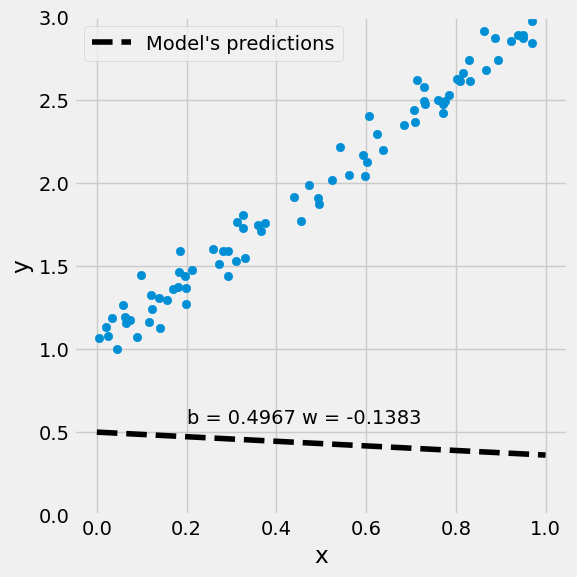

In [8]:
figure2(x_train, y_train, b, w)

## Step 2: Compute the Loss

$$
\Large \text{error}_i = \hat{y_i} - y_i
$$

(<Figure size 600x600 with 1 Axes>, <Axes: xlabel='x', ylabel='y'>)

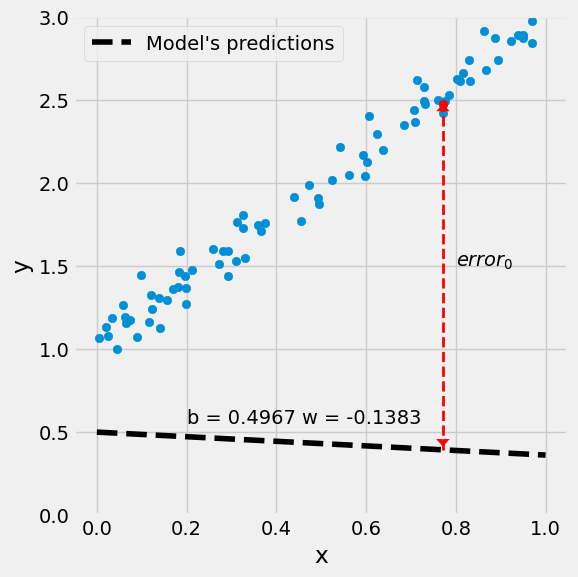

In [9]:
figure3(x_train, y_train, b, w)

$$
\Large
\begin{aligned}
\text{MSE} &= \frac{1}{n} \sum_{i=1}^n{\text{error}_i}^2
\\
&= \frac{1}{n} \sum_{i=1}^n{(\hat{y_i} - y_i)}^2
\\
&= \frac{1}{n} \sum_{i=1}^n{(b + w x_i - y_i)}^2
\end{aligned}
$$

In [10]:
# Step 2 - Computing the loss
# We are using ALL data points, so this is BATCH gradient
# descent. How wrong is our model? That's the error!
error = (yhat - y_train)

# It is a regression, so it computes mean squared error (MSE)
loss = (error ** 2).mean()
print(loss)

2.7421577700550976


### Loss Surface

由于这里的MSE损失函数是二元函数，所以既可以使用3D投影又可以使用等高线的方式来对其进行可视化。

In [11]:
# Reminder:
# true_b = 1
# true_w = 2

# we have to split the ranges in 100 evenly spaced intervals each
b_range = np.linspace(true_b - 3, true_b + 3, 101)
w_range = np.linspace(true_w - 3, true_w + 3, 101)
# meshgrid is a handy function that generates a grid of b and w
# values for all combinations
bs, ws = np.meshgrid(b_range, w_range, indexing="xy")  # 基于广播实现笛卡尔积
bs.shape, ws.shape

((101, 101), (101, 101))

In [12]:
bs

array([[-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ],
       [-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ],
       [-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ],
       ...,
       [-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ],
       [-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ],
       [-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ]])

In [13]:
ws

array([[-1.  , -1.  , -1.  , ..., -1.  , -1.  , -1.  ],
       [-0.94, -0.94, -0.94, ..., -0.94, -0.94, -0.94],
       [-0.88, -0.88, -0.88, ..., -0.88, -0.88, -0.88],
       ...,
       [ 4.88,  4.88,  4.88, ...,  4.88,  4.88,  4.88],
       [ 4.94,  4.94,  4.94, ...,  4.94,  4.94,  4.94],
       [ 5.  ,  5.  ,  5.  , ...,  5.  ,  5.  ,  5.  ]])

In [14]:
sample_x = x_train[0]
sample_yhat = bs + ws * sample_x
sample_yhat.shape

(101, 101)

In [15]:
x_train.shape

(80, 1)

In [16]:
all_predictions = np.apply_along_axis(
    func1d=lambda x: bs + ws * x, 
    axis=1,  # 沿着x_train的第一个维度来计算
    arr=x_train
)
all_predictions.shape

(80, 101, 101)

In [17]:
y_train.shape

(80, 1)

In [18]:
all_labels = y_train.reshape(-1, 1, 1)
all_labels.shape

(80, 1, 1)

In [19]:
all_errors = (all_predictions - all_labels)
all_errors.shape

(80, 101, 101)

In [20]:
all_losses = (all_errors ** 2).mean(axis=0)
all_losses.shape

(101, 101)

In [21]:
figure4(x_train, y_train, b, w, bs, ws, all_losses)

### Cross Sections 

这里分别使用`b = 0.52`以及`w = -0.16`两个横截面来演示两个偏导数：$\frac{\partial l}{\partial b}$和$\frac{\partial l}{\partial w}$。

(<Figure size 1200x600 with 2 Axes>,
 array([<Axes: title={'center': 'Loss Surface'}, xlabel='b', ylabel='w'>,
        <Axes: title={'center': 'Fixed: b = 0.52'}, xlabel='w', ylabel='Loss'>],
       dtype=object))

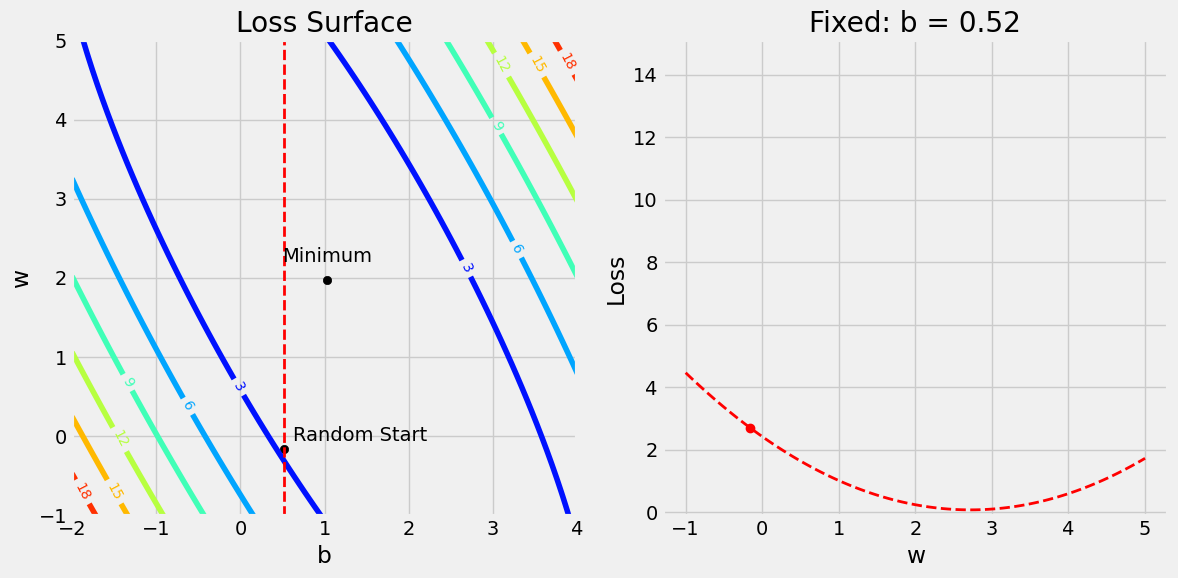

In [22]:
figure5(x_train, y_train, b, w, bs, ws, all_losses)

(<Figure size 1200x600 with 2 Axes>,
 array([<Axes: title={'center': 'Loss Surface'}, xlabel='b', ylabel='w'>,
        <Axes: title={'center': 'Fixed: w = -0.16'}, xlabel='b', ylabel='Loss'>],
       dtype=object))

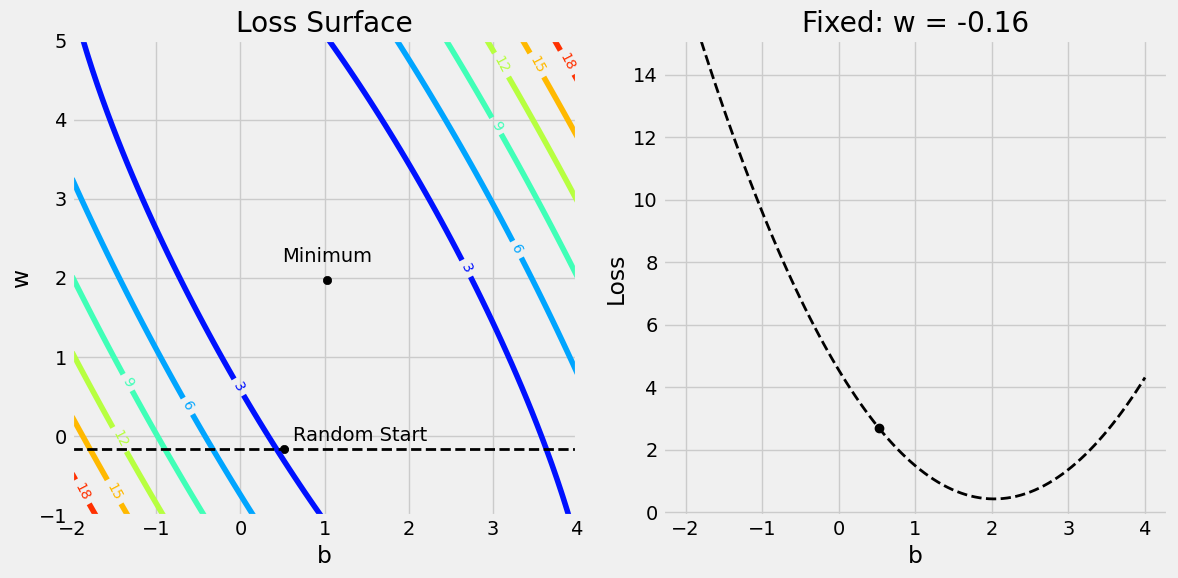

In [23]:
figure6(x_train, y_train, b, w, bs, ws, all_losses)

## Step 3: Compute the Gradients

$$
\Large
\begin{aligned}
\frac{\partial{\text{MSE}}}{\partial{b}} = \frac{\partial{\text{MSE}}}{\partial{\hat{y_i}}} \frac{\partial{\hat{y_i}}}{\partial{b}} &= \frac{1}{n} \sum_{i=1}^n{2(b + w x_i - y_i)} 
\\
&= 2 \frac{1}{n} \sum_{i=1}^n{(\hat{y_i} - y_i)}
\\
\frac{\partial{\text{MSE}}}{\partial{w}} = \frac{\partial{\text{MSE}}}{\partial{\hat{y_i}}} \frac{\partial{\hat{y_i}}}{\partial{w}} &= \frac{1}{n} \sum_{i=1}^n{2(b + w x_i - y_i) x_i} 
\\
&= 2 \frac{1}{n} \sum_{i=1}^n{x_i (\hat{y_i} - y_i)}
\end{aligned}
$$

In [24]:
# Step 3 - Computes gradients for both "b" and "w" parameters
b_grad = 2 * error.mean()
w_grad = 2 * (x_train * error).mean()
print(b_grad, w_grad)

-3.044811379650508 -1.8337537171510832


### Visualizing the Gradients

(<Figure size 1200x600 with 2 Axes>,
 array([<Axes: title={'center': 'Fixed: b = 0.52'}, xlabel='w', ylabel='MSE (loss)'>,
        <Axes: title={'center': 'Fixed: w = -0.16'}, xlabel='b'>],
       dtype=object))

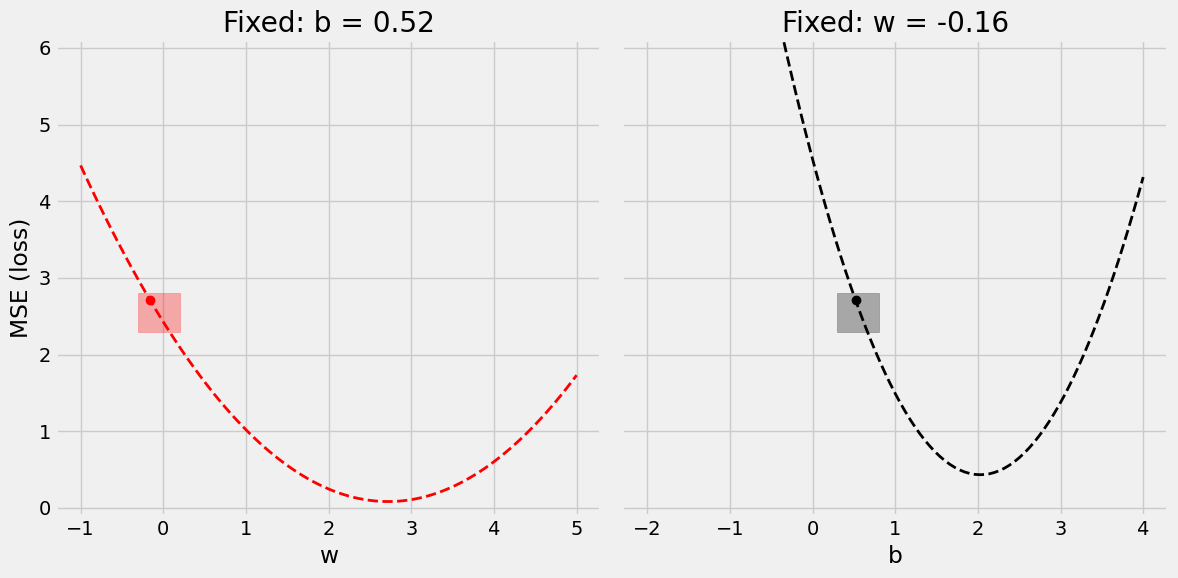

In [25]:
figure7(b, w, bs, ws, all_losses)

(<Figure size 1200x600 with 2 Axes>,
 array([<Axes: title={'center': 'Fixed: b = 0.52'}, xlabel='w', ylabel='MSE (loss)'>,
        <Axes: title={'center': 'Fixed: w = -0.16'}, xlabel='b'>],
       dtype=object))

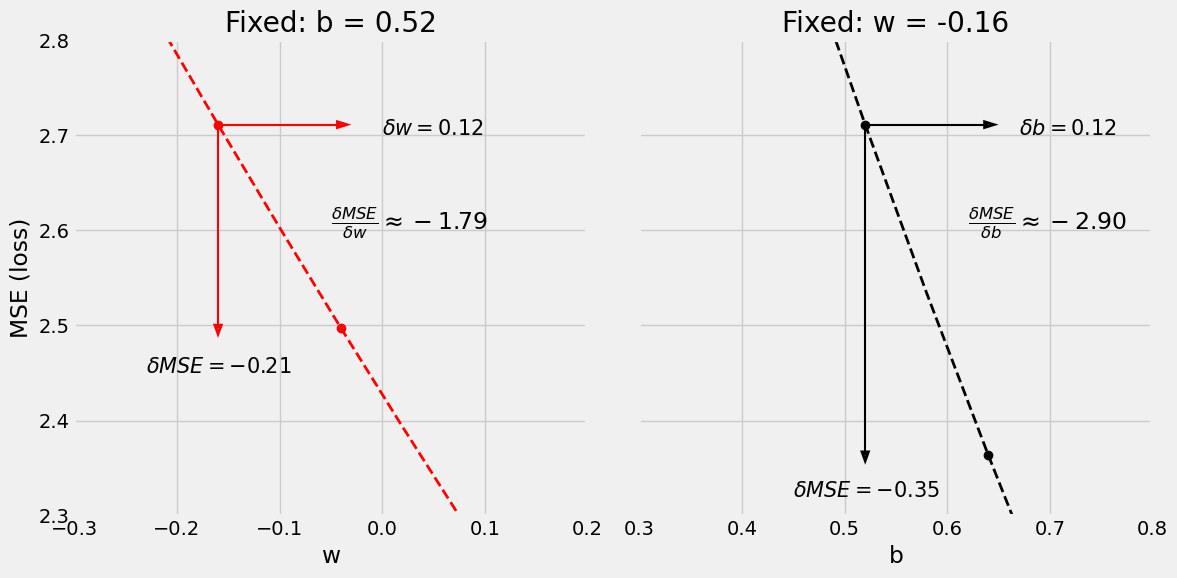

In [26]:
figure8(b, w, bs, ws, all_losses)

### Backpropagation

## Step 4: Update the Parameters

$$
\Large
\begin{aligned}
b &= b - \eta \frac{\partial{\text{MSE}}}{\partial{b}}
\\
w &= w - \eta \frac{\partial{\text{MSE}}}{\partial{w}}
\end{aligned}
$$

In [27]:
# Sets learning rate - this is "eta" ~ the "n" like Greek letter
lr = 0.1
print(f"Before updating: ", b, w)

# Step 4 - Updates parameters using gradients and the 
# learning rate
b = b - lr * b_grad
w = w - lr * w_grad

print(f"After updating:  ", b, w)

Before updating:  [0.49671415] [-0.1382643]
After updating:   [0.80119529] [0.04511107]


(<Figure size 600x600 with 1 Axes>, <Axes: xlabel='x', ylabel='y'>)

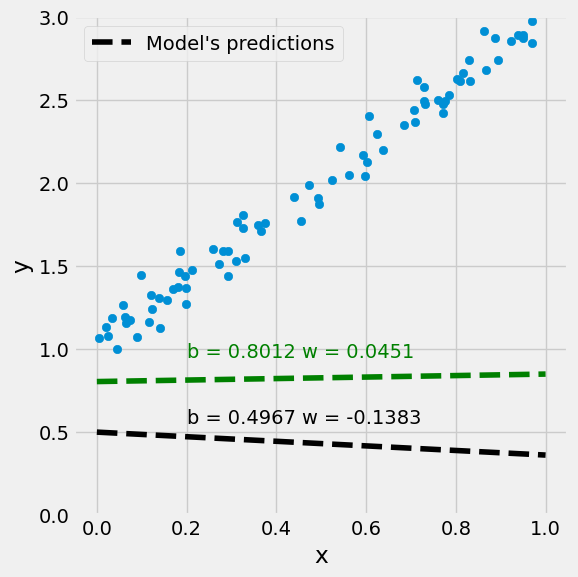

In [28]:
figure9(x_train, y_train, b, w)

### Learning Rate

In [29]:
manual_grad_b = -2.90
manual_grad_w = -1.79

np.random.seed(42)
b_initial = np.random.randn(1)
w_initial = np.random.randn(1)

#### Low Learning Rate

(<Figure size 1200x600 with 2 Axes>,
 array([<Axes: title={'center': 'Fixed: b = 0.52'}, xlabel='w', ylabel='MSE (loss)'>,
        <Axes: title={'center': 'Fixed: w = -0.16'}, xlabel='b'>],
       dtype=object))

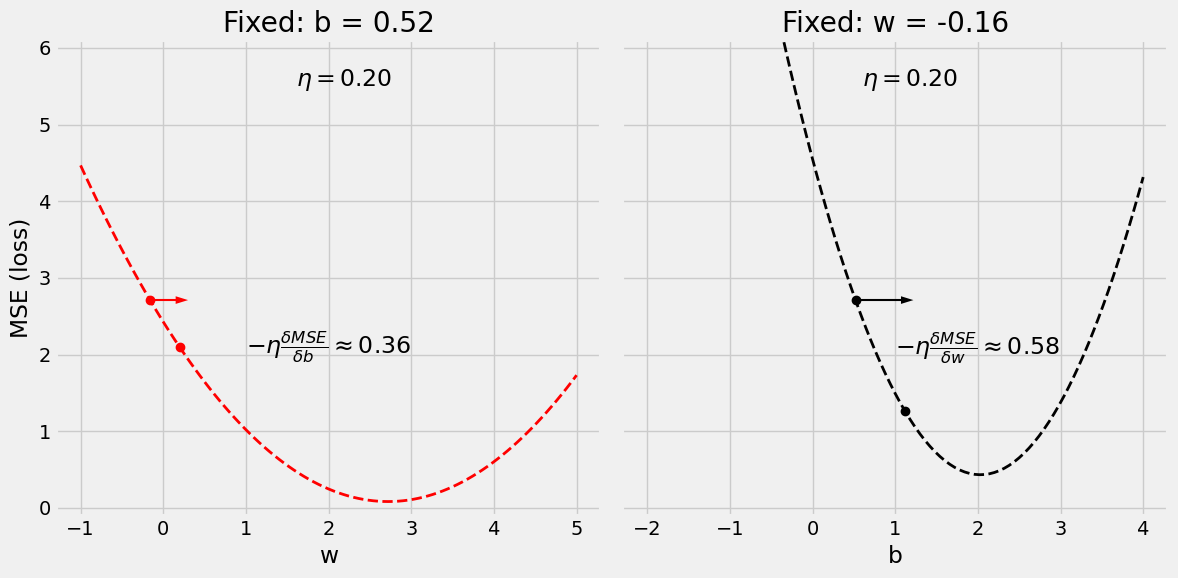

In [30]:
# Learning rate - greek letter "eta" that looks like an "n"
lr = .2

figure10(b_initial, w_initial, bs, ws, all_losses, manual_grad_b, manual_grad_w, lr)

#### High Learning Rate

(<Figure size 1200x600 with 2 Axes>,
 array([<Axes: title={'center': 'Fixed: b = 0.52'}, xlabel='w', ylabel='MSE (loss)'>,
        <Axes: title={'center': 'Fixed: w = -0.16'}, xlabel='b'>],
       dtype=object))

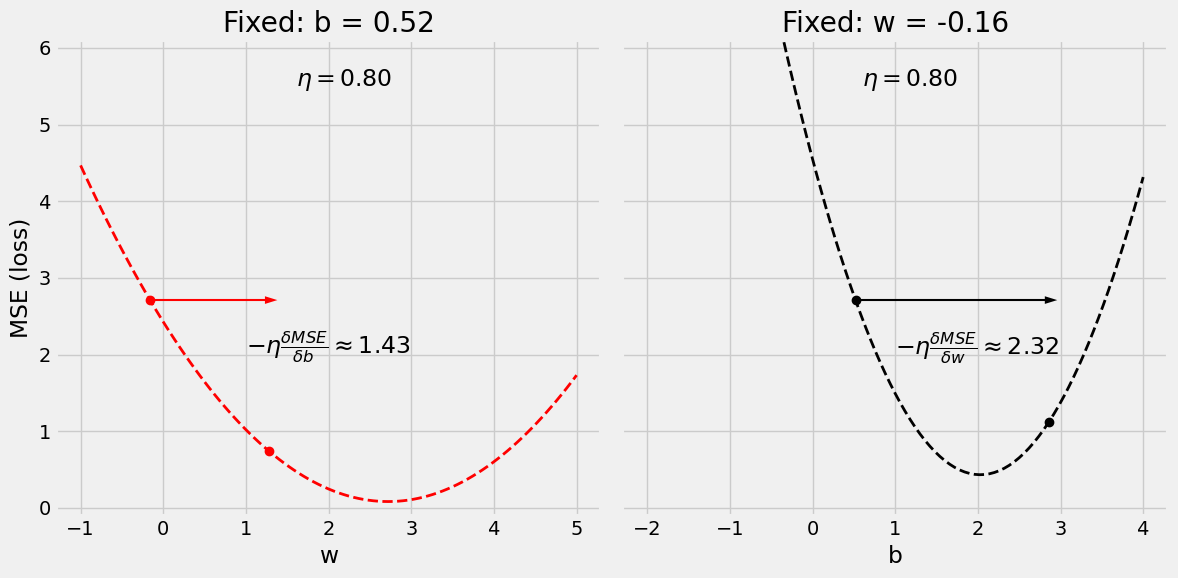

In [31]:
# Learning rate - greek letter "eta" that looks like an "n"
lr = .8

figure10(b_initial, w_initial, bs, ws, all_losses, manual_grad_b, manual_grad_w, lr)

#### Very High Learning Rate

(<Figure size 1200x600 with 2 Axes>,
 array([<Axes: title={'center': 'Fixed: b = 0.52'}, xlabel='w', ylabel='MSE (loss)'>,
        <Axes: title={'center': 'Fixed: w = -0.16'}, xlabel='b'>],
       dtype=object))

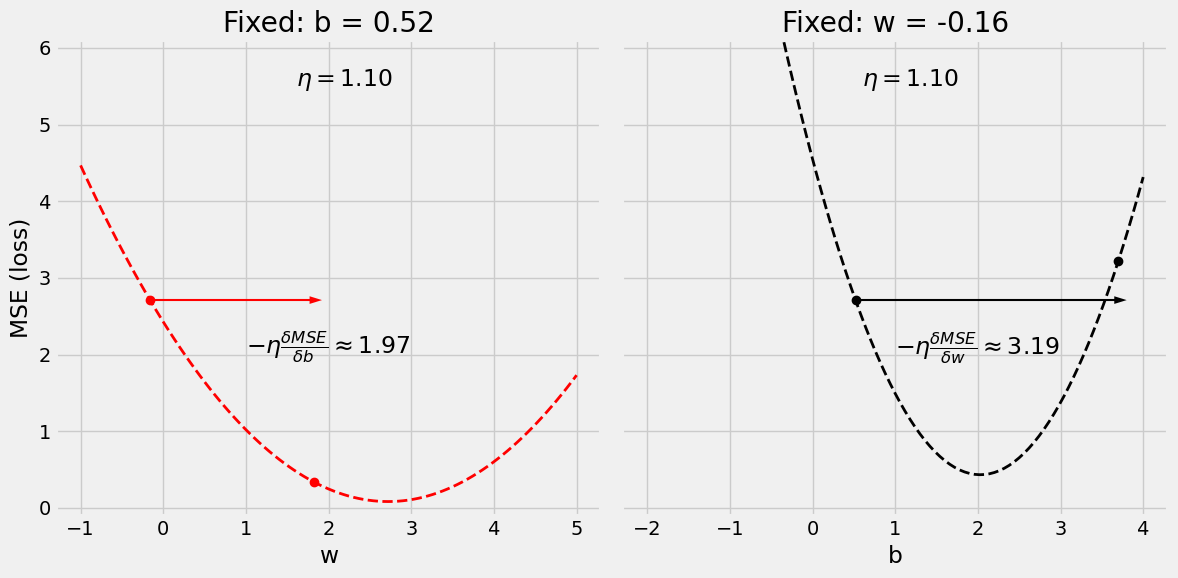

In [32]:
# Learning rate - greek letter "eta" that looks like an "n"
lr = 1.1

figure10(b_initial, w_initial, bs, ws, all_losses, manual_grad_b, manual_grad_w, lr)

#### "Bad" Feature

In [33]:
true_b = 1
true_w = 2
N = 100

# Data Generation
np.random.seed(42)

# We divide w by 10
bad_w = true_w / 10
# And multiply x by 10
bad_x = np.random.rand(N, 1) * 10

# So, the net effect on y is zero - it is still
# the same as before
y = true_b + bad_w * bad_x + (.1 * np.random.randn(N, 1))

In [34]:
# Generates train and validation sets
# It uses the same train_idx and val_idx as before,
# but it applies to bad_x
bad_x_train, y_train = bad_x[train_idx], y[train_idx]
bad_x_val, y_val = bad_x[val_idx], y[val_idx]

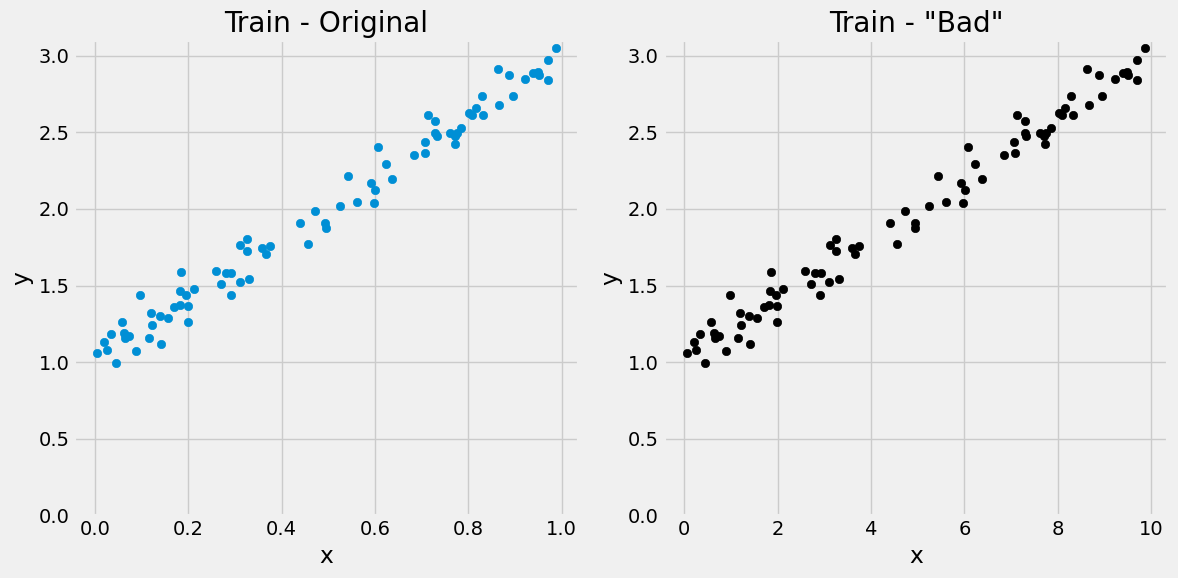

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].scatter(x_train, y_train)
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].set_ylim([0, 3.1])
ax[0].set_title('Train - Original')
ax[1].scatter(bad_x_train, y_train, c='k')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_ylim([0, 3.1])
ax[1].set_title('Train - "Bad"')
fig.tight_layout()

In [36]:
# The ranges CHANGED because we are centering at the new minimum, using "bad" data
bad_b_range = np.linspace(-2, 4, 101)
bad_w_range = np.linspace(-2.8, 3.2, 101)
bad_bs, bad_ws = np.meshgrid(bad_b_range, bad_w_range)

(<Figure size 1200x600 with 2 Axes>,
 array([<Axes: title={'center': 'Loss Surface - Before'}, xlabel='b', ylabel='w'>,
        <Axes: title={'center': 'Loss Surface - After'}, xlabel='b', ylabel='w'>],
       dtype=object))

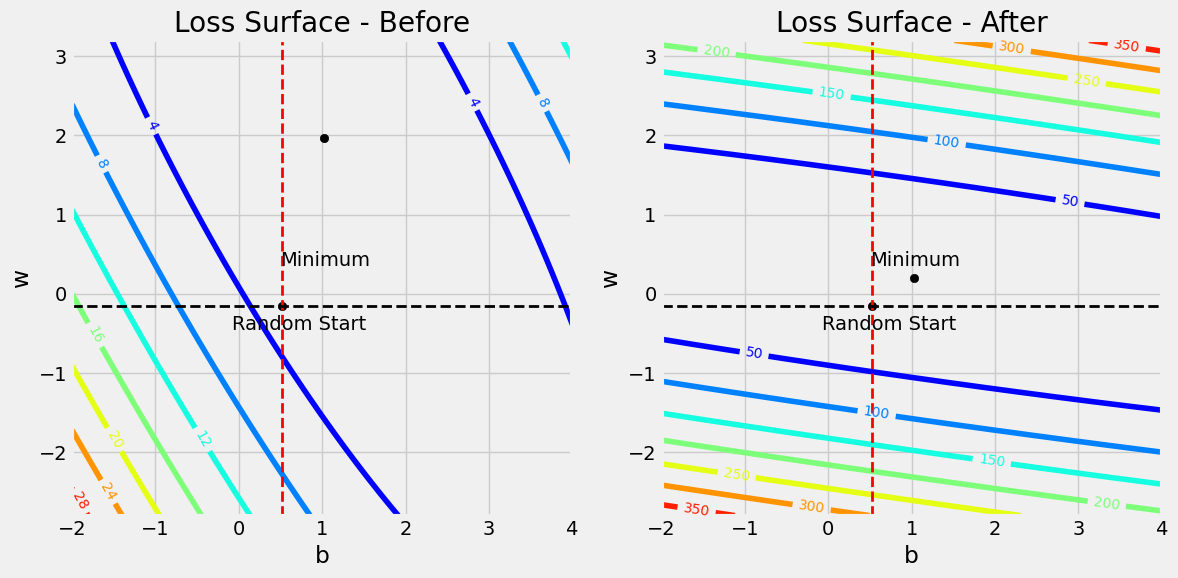

In [37]:
figure14(x_train, y_train, b_initial, w_initial, bad_bs, bad_ws, bad_x_train)

(<Figure size 1200x600 with 2 Axes>,
 array([<Axes: title={'center': 'Fixed: b = 0.52'}, xlabel='w', ylabel='Loss'>,
        <Axes: title={'center': 'Fixed: w = -0.16'}, xlabel='b', ylabel='Loss'>],
       dtype=object))

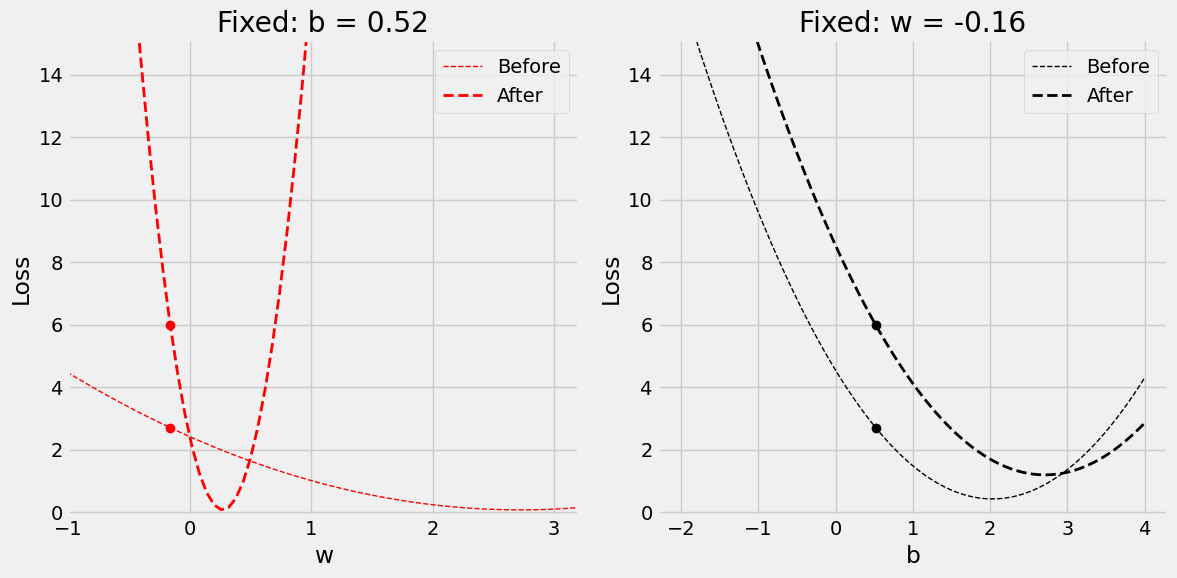

In [38]:
figure15(x_train, y_train, b_initial, w_initial, bad_bs, bad_ws, bad_x_train)

#### Scaling / Standardizing / Normalizing

$$
\Large
\overline{X} = \frac{1}{N}\sum_{i=1}^N{x_i}
\\
\Large
\sigma(X) = \sqrt{\frac{1}{N}\sum_{i=1}^N{(x_i - \overline{X})^2}}
\\
\Large
\text{scaled } x_i=\frac{x_i-\overline{X}}{\sigma(X)}
$$

In [39]:
scaler = StandardScaler(with_mean=True, with_std=True)
# We use the TRAIN set ONLY to fit the scaler
scaler.fit(x_train)  # don't fit x_val!

# Now we can use the already fit scaler to TRANSFORM
# both TRAIN and VALIDATION sets
scaled_x_train = scaler.transform(x_train)
scaled_x_val = scaler.transform(x_val)

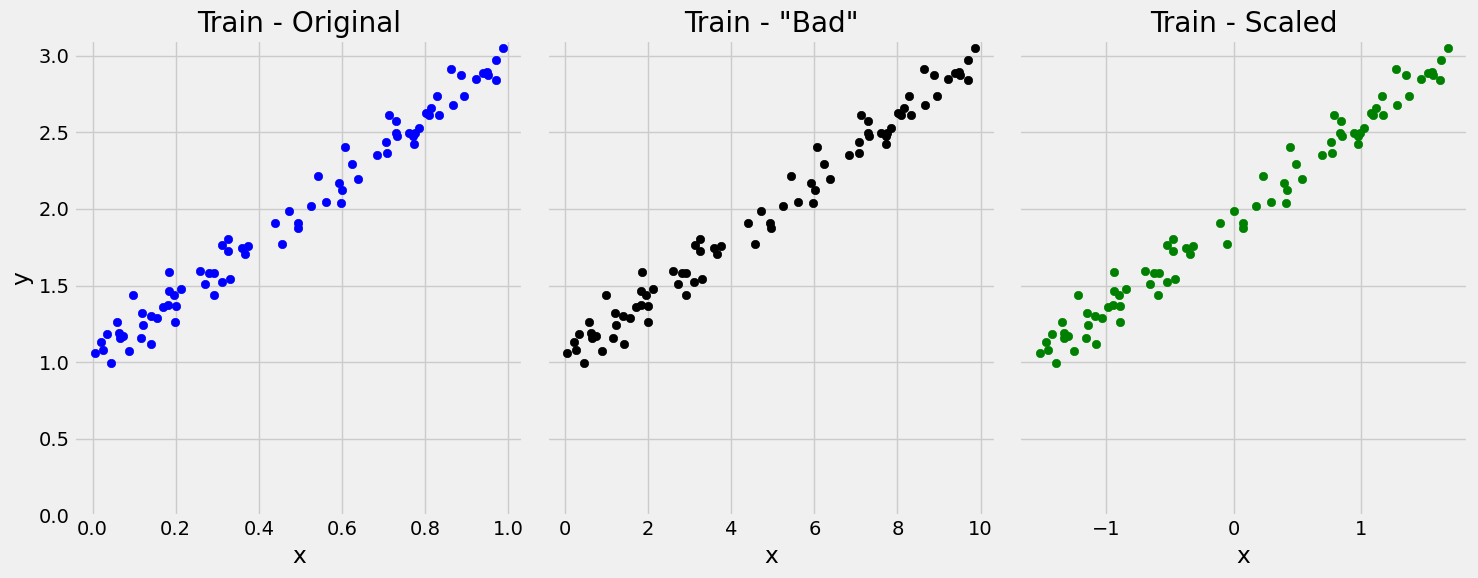

In [40]:
fig, ax = plt.subplots(1, 3, figsize=(15, 6))
ax[0].scatter(x_train, y_train, c='b')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].set_ylim([0, 3.1])
ax[0].set_title('Train - Original')
ax[1].scatter(bad_x_train, y_train, c='k')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_ylim([0, 3.1])
ax[1].set_title('Train - "Bad"')
ax[1].label_outer()
ax[2].scatter(scaled_x_train, y_train, c='g')
ax[2].set_xlabel('x')
ax[2].set_ylabel('y')
ax[2].set_ylim([0, 3.1])
ax[2].set_title('Train - Scaled')
ax[2].label_outer()

fig.tight_layout()

In [41]:
# The ranges CHANGED AGAIN because we are centering at the new minimum, using "scaled" data
scaled_b_range = np.linspace(-1, 5, 101)
scaled_w_range = np.linspace(-2.4, 3.6, 101)
scaled_bs, scaled_ws = np.meshgrid(scaled_b_range, scaled_w_range)

(<Figure size 1500x600 with 3 Axes>,
 array([<Axes: title={'center': 'Loss Surface - Original'}, xlabel='b', ylabel='w'>,
        <Axes: title={'center': 'Loss Surface - "Bad"'}, xlabel='b', ylabel='w'>,
        <Axes: title={'center': 'Loss Surface - Scaled'}, xlabel='b', ylabel='w'>],
       dtype=object))

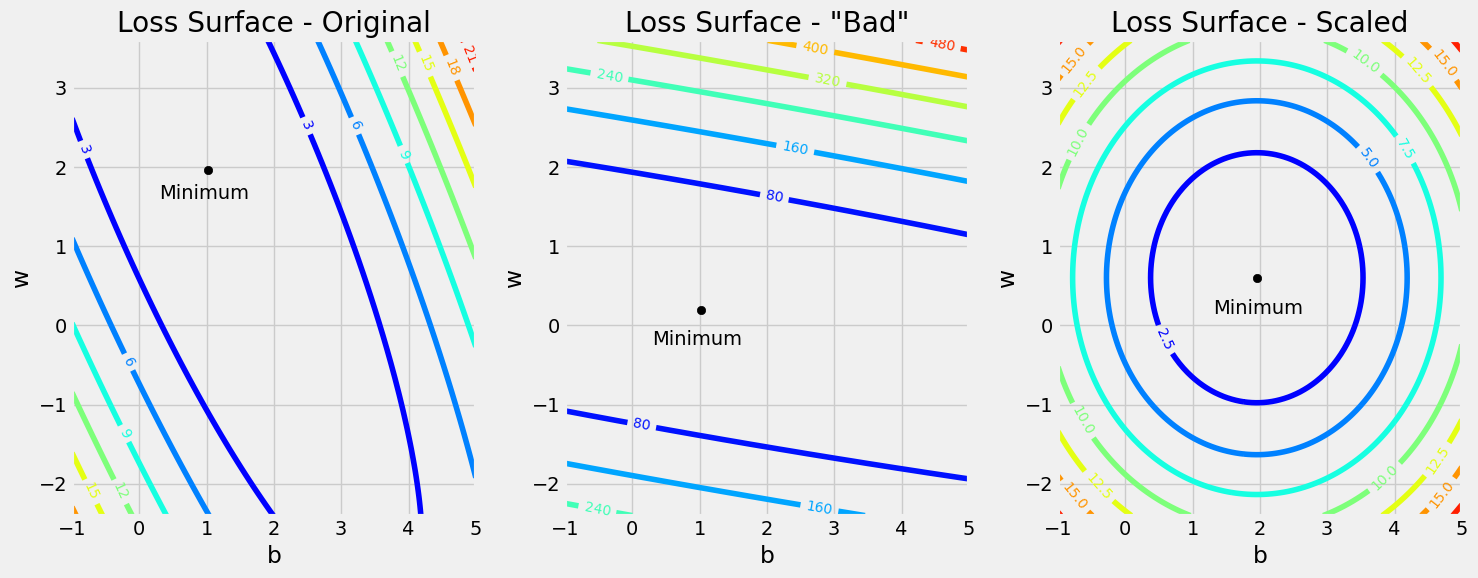

In [42]:
figure17(x_train, y_train, scaled_bs, scaled_ws, bad_x_train, scaled_x_train)

## Step 5: Rinse and Repeat!

(<Figure size 600x600 with 1 Axes>, <Axes: xlabel='x', ylabel='y'>)

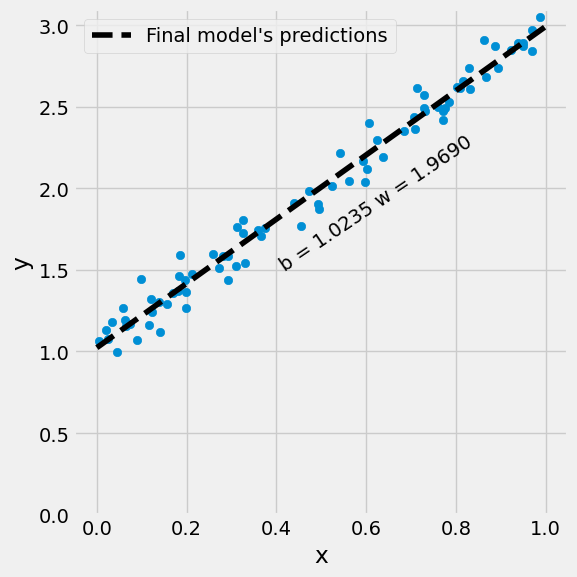

In [43]:
figure18(x_train, y_train)

### The Path of Gradient Descent

Even though the plots are important to illustrate the paths, the corresponding code is beyond the scope of this chapter.

![](images/paths.png)